#####NAMA : FARISYAH LUTFIAH HANIS
#####ID   : DS5H17

#IMPORT LIBRARY & DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DATA UNDERSTANDING

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset/house_price/train.csv')
pd.set_option('display.max_columns', 100) #agar seluruh fitur dapat terlihat
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Fitur berjumlah 81, dengan tipe data yaitu integer, float, dan char
- Total baris berjumlah 1460
- Fitur yang mengandung missing value yaitu Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

In [ ]:
# untuk melihat jumlah baris dan kolom
df.shape

(1460, 81)

In [ ]:
pd.set_option('display.max_columns', 100)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Harga rumah ini dari range 34900 sampai 755000 dengan rata-rata harga rumah 163000. Sebaran harga rumahnya yaitu right skew, terlihat dari nilai mean lebih besar mediannya, artinya data cenderung lebih banyak berkumpul pada nilai minimum.

In [ ]:
pd.set_option('display.max_columns', 43)
df.describe(include=object) #khusus tipe data object

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes (exclude = [np.number])
(numeric_data.shape[1], cat_data.shape[1])

(38, 43)

<ipython-input-9-25057a373a7c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


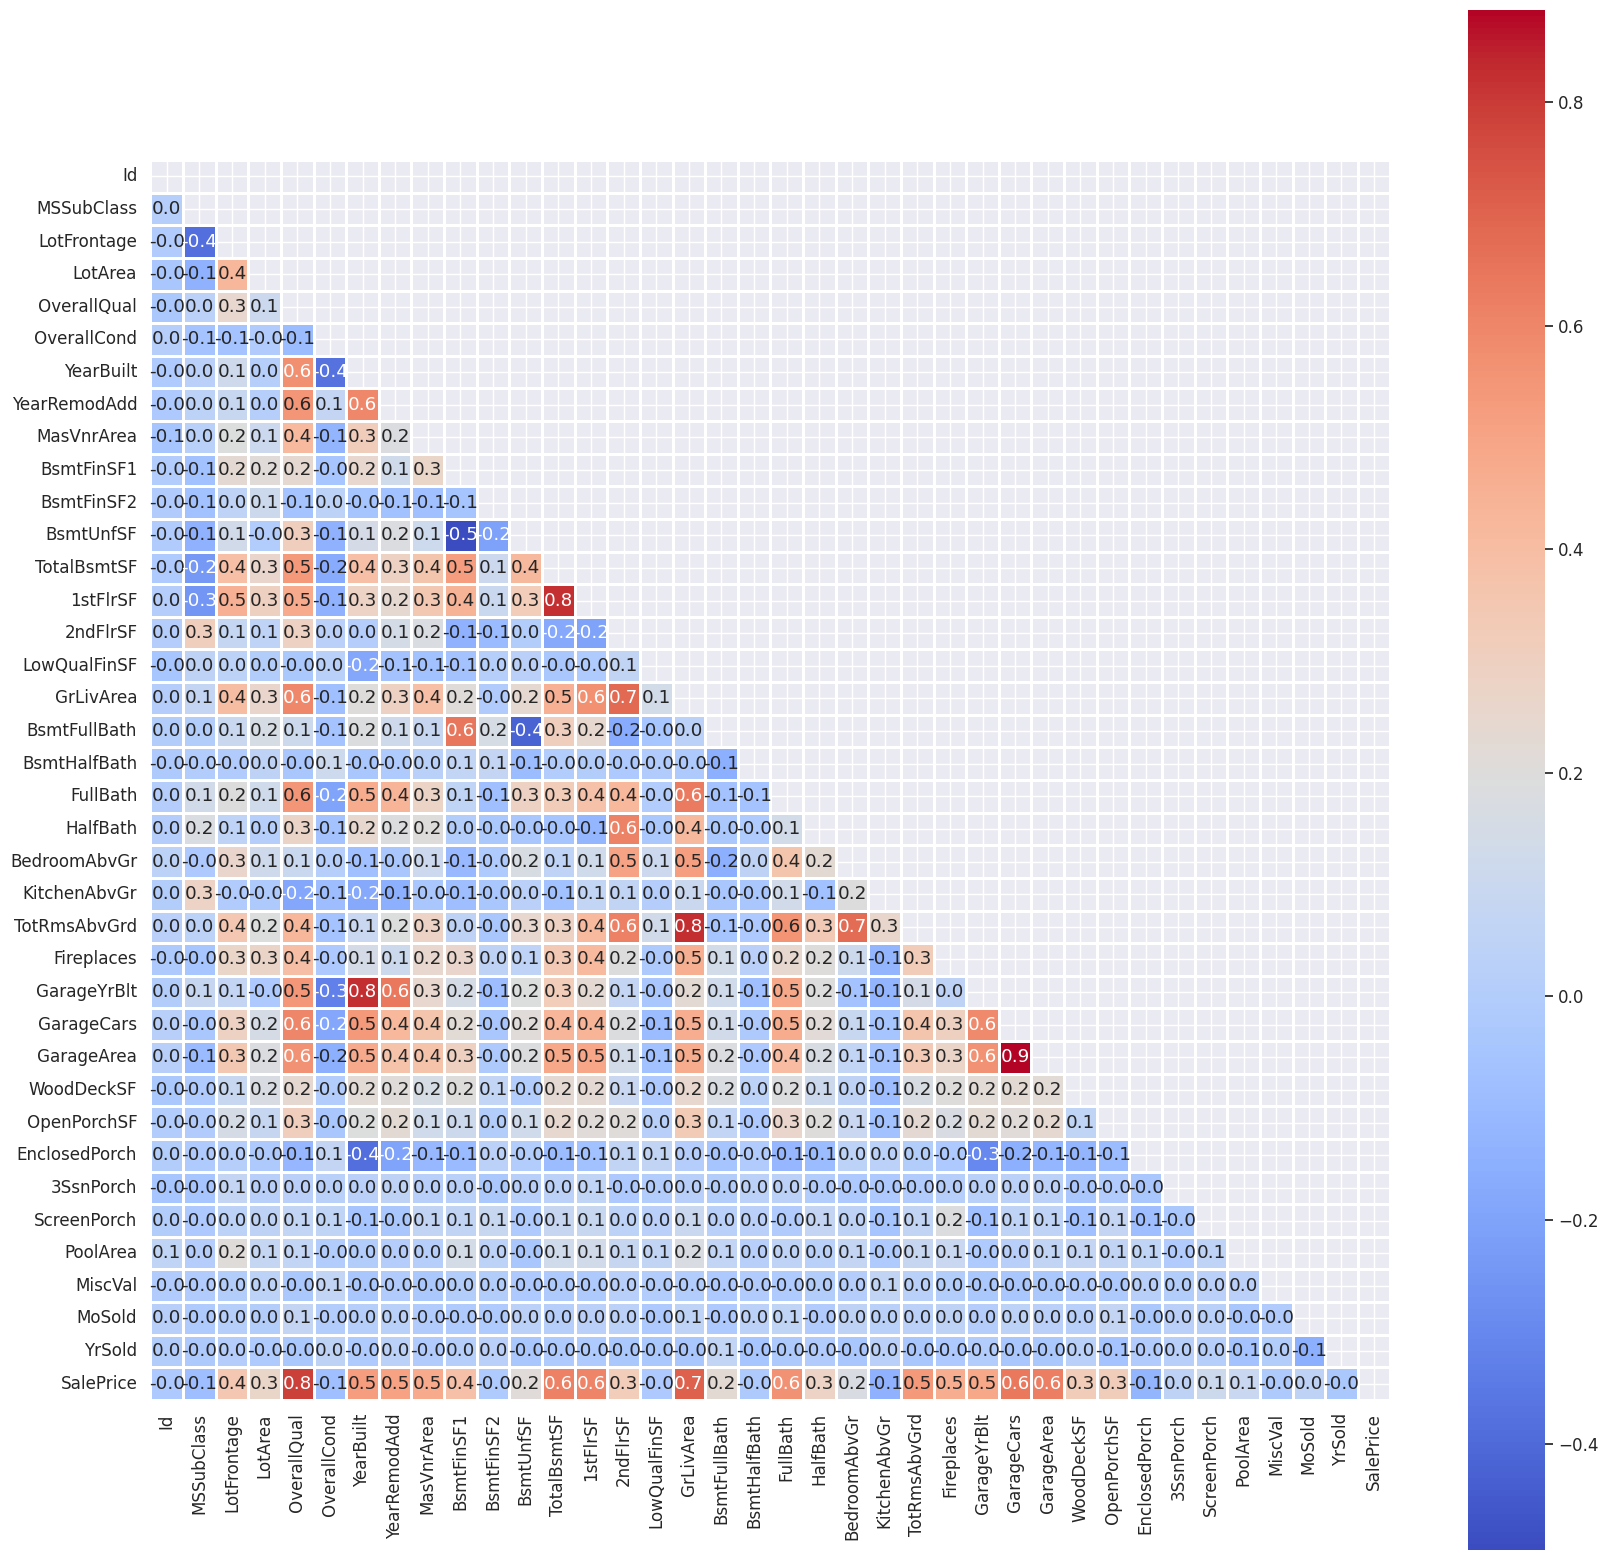

In [ ]:
sns.set(font_scale=1.1)
corr_df = df.corr()
mask = np.triu(corr_df.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, annot=True, fmt='.1f', cmap='coolwarm', square=True, mask=mask, linewidth=1, cbar=True)
plt.show()

In [ ]:
# karena hasil korelasi tidak dilihat karena banyaknya fitur, maka akan coba menampilkan informasi dari 15 korelasi tertinngi
print(corr_df['SalePrice'].sort_values(ascending=False)[:15],'\n')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 



#DATA PREPARATION


##1. Missing Value

###Check Missing Value

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Ini merupakan daftar fitur fitur yang memiliki missing value

In [ ]:
missing_values = df.isnull().sum()/len(df)*100
print(missing_values[missing_values > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


Waw, ternyata ada fitur yang missing valuenya hampir 100%😯

###Handling Missing Value

In [ ]:
#Dropping missing value
df = df.drop(['Alley','Fence','PoolQC','MiscFeature'], axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,...,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,...,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,...,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,...,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,...,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Fitur fitur tersebut dihapus karena memiliki missing value lebih dari 80%

In [ ]:
# cek kembali jumlah baris dan kolom
df.shape

(1460, 77)

In [ ]:
#Imputing missing values LotFrontage
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [ ]:
#Imputing missing values LotFrontage
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [ ]:
#Imputing missing values GarageYrBlt
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [ ]:
#Menghitung nilai modus untuk semua kolom kategorikal
mode_values = df.select_dtypes(include='object').mode().iloc[0]

#Mengisi missing value di kolom kategorikal dengan nilai modus
df.fillna(mode_values, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Missing value sudah tidak ada lagi👍

In [ ]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

##2. Duplicates

###Check Duplicate

In [ ]:
# Check duplicate values
df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Ternyata tidak ada nilai yang duplikat😀

##3. Outliers

###SalePrice

<Axes: >

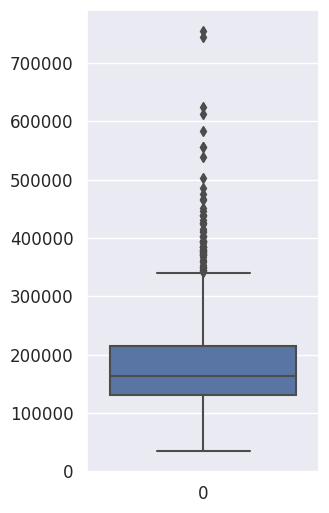

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['SalePrice'])

Pada fitur SalePrice terdapat nilai outlier diluar batas nilai maksimum

In [ ]:
#Tentukan batas bawah dan batas atas untuk outlier
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outlier_value = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
outlier_value

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.000000,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,...,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,0,7,2006,New,Partial,345000
53,54,20,RL,68.000000,50271,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,...,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,0,11,2006,WD,Normal,385000
58,59,60,RL,66.000000,13682,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,...,Gd,BuiltIn,2006.0,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,0,10,2006,New,Partial,438780
112,113,60,RL,77.000000,9965,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,...,Gd,BuiltIn,2007.0,Fin,3,792,TA,TA,Y,120,184,0,0,168,0,0,10,2007,New,Partial,383970
151,152,20,RL,107.000000,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,...,Gd,Attchd,2007.0,RFn,3,866,TA,TA,Y,0,102,0,0,0,0,0,1,2008,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,70.049958,14100,Pave,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,9,1935,1997,Gable,...,Gd,BuiltIn,1982.0,Unf,3,1014,TA,TA,Y,314,12,0,0,0,0,0,5,2008,WD,Normal,381000
1353,1354,50,RL,56.000000,14720,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1995,1996,Hip,...,Ex,Attchd,1996.0,Fin,3,666,TA,TA,Y,283,86,0,0,0,0,0,3,2010,WD,Normal,410000
1373,1374,20,RL,70.049958,11400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,...,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,0,3,2007,WD,Normal,466500
1388,1389,20,RL,42.000000,14892,Pave,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,...,Gd,Attchd,2006.0,Fin,3,758,TA,TA,Y,201,39,0,0,0,0,0,10,2009,WD,Normal,377500


Nilai outliersnya adalah nilai yang lebih dari upper_boundnya

In [ ]:
#hapus nilai yang outlier
df = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]

In [ ]:
#cek kembali baris dan kolom
df.shape

(1399, 77)

<Axes: >

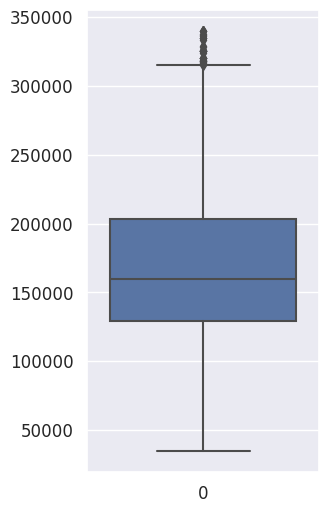

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['SalePrice'])

###YearBuilt

<Axes: >

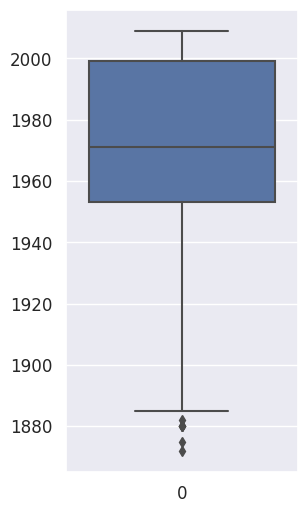

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['YearBuilt'])

Pada fitur YearBuilt terdapat nilai outlier diluar batas nilai minimum

IMPUTATION

In [ ]:
#Hitung nilai median dari atribut YearBuilt
median_year_built = df['YearBuilt'].median()

In [ ]:
#Tentukan batas bawah dan batas atas untuk outlier
Q1 = df['YearBuilt'].quantile(0.25)
Q3 = df['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#Imputasi outlier dengan nilai median
data_imputasi = df.loc[(df['YearBuilt'] < lower_bound) | (df['YearBuilt'] > upper_bound), 'YearBuilt'] = median_year_built

### GrLivArea

<Axes: >

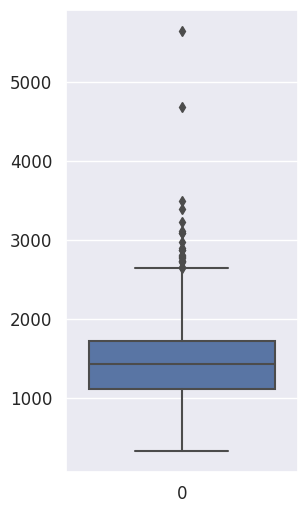

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['GrLivArea'])

Pada fitur GrLivArea terdapat nilai outlier diluar batas nilai maksimum

IMPUTATION

In [ ]:
#Hitung nilai median dari atribut YearBuilt
mean_grade_living = df['GrLivArea'].mean()

In [ ]:
#Tentukan batas bawah dan batas atas untuk outlier
Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#Imputasi outlier dengan nilai mean
df.loc[(df['GrLivArea'] < lower_bound) | (df['GrLivArea'] > upper_bound), 'GrLivArea'] = mean_grade_living

###LotArea

<Axes: >

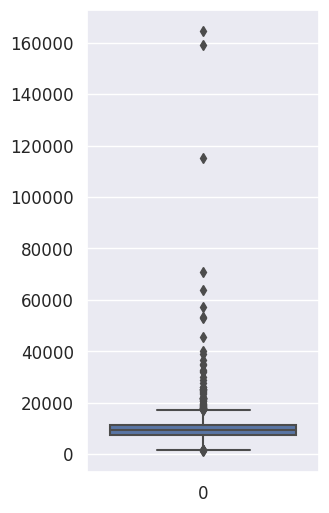

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['LotArea'])

Pada fitur LotArea terdapat nilai outlier diluar batas nilai minimum dan maksimum

IMPUTATION

In [ ]:
#Hitung nilai mean dari atribut YearBuilt
mean_grade_living = df['LotArea'].mean()

In [ ]:
#Tentukan batas bawah dan batas atas untuk outlier
Q1 = df['LotArea'].quantile(0.25)
Q3 = df['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#Imputasi outlier dengan nilai mean
df.loc[(df['LotArea'] < lower_bound) | (df['LotArea'] > upper_bound), 'LotArea'] = mean_grade_living

In [ ]:
print(corr_df['SalePrice'].sort_values(ascending=False)[:15],'\n')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 



# FEATURE SELECTION

Pemilihan fitur yang akan dimasukkan ke dalam model. Ada 10 fitur yang akan dimasukkan ke dalam model regresi karena fitur ini yang memiliki hubungan yang kuat dengan variabel target. Fitur-fitur tersebut adalah OverallQual (0.79), GrLivArea (0.70), GarageCars (0.64), GarageArea (0.62), TotalBsmtSF (0.61), 1stFlrSF (0.60), FullBath (0.56), TotRmsAbvGrd (0.53), YearBuilt (0.52), dan YearRemodAdd (0.50).

#MODELLING

In [ ]:
#pisahkan varible X dan Y, dimana X diisi oleh variable yang dibutuhkan aja yang udah kita tentukan di feature selection
x = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
        '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]

In [ ]:
y = pd.DataFrame(df['SalePrice'])

In [ ]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [ ]:
x

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710.0,2,548,856,856,2,8,2003,2003
1,6,1262.0,2,460,1262,1262,2,6,1976,1976
2,7,1786.0,2,608,920,920,2,6,2001,2002
3,7,1717.0,3,642,756,961,1,7,1915,1970
4,8,2198.0,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647.0,2,460,953,953,2,7,1999,2000
1456,6,2073.0,2,500,1542,2073,2,7,1978,1988
1457,7,2340.0,1,252,1152,1188,2,9,1941,2006
1458,5,1078.0,1,240,1078,1078,1,5,1950,1996


In [ ]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
# 80% data untuk dilatih
x_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
808,5,1086.0,2,484,1024,1086,1,6,1966,1966
1218,4,912.0,0,0,0,672,1,3,1947,1950
1073,6,1426.0,2,440,690,698,1,6,1977,1977
1356,5,892.0,1,264,864,892,1,5,1966,1966
873,5,1268.0,1,288,832,1036,1,6,1949,1950
...,...,...,...,...,...,...,...,...,...,...
1145,5,1576.0,1,225,1042,1042,1,8,1928,1950
1183,5,1130.0,2,720,1120,1130,1,5,1920,1950
1351,6,1716.0,2,490,858,858,1,8,1962,1962
906,8,1636.0,3,865,1623,1636,2,8,2006,2006


##Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

 Penskalaan data pada data latih (x_train) dan data uji (x_test) menggunakan StandardScaler

In [ ]:
#menampilkan dataset X_train setelah di scaling
np.set_printoptions(suppress=True)
print(x_train[:10])

[[-0.77952062 -0.84163456  0.37158754  0.10512631 -0.02521682 -0.1264225
  -1.02457625 -0.2660066  -0.16121572 -0.91868704]
 [-1.55904124 -1.24216561 -2.33796518 -2.18686068 -2.48283303 -1.27641811
  -1.02457625 -2.21834228 -0.79633931 -1.70391828]
 [ 0.         -0.05898769  0.37158754 -0.10323615 -0.8268221  -1.20419617
  -1.02457625 -0.2660066   0.20648741 -0.37884056]
 [-0.77952062 -1.28820367 -0.98318882 -0.93668596 -0.40921935 -0.66530933
  -1.02457625 -0.91678516 -0.16121572 -0.91868704]
 [-0.77952062 -0.42268829 -0.98318882 -0.82303371 -0.48601986 -0.26531086
  -1.02457625 -0.2660066  -0.7294842  -1.70391828]
 [ 0.         -0.21781896 -0.98318882 -0.70938147 -0.03721689  0.62635241
  -1.02457625 -0.91678516 -0.39520862  1.04439108]
 [ 0.          2.69869161  1.7263639   1.90462022  0.80518866  0.66246338
   0.83234435  2.33710763 -1.76573848 -1.70391828]
 [ 2.33856186  0.91701901  1.7263639   1.46895328  1.916396    1.99579163
   0.83234435  1.03555051  1.10903146  0.99531413]
 

In [ ]:
print(y_train[:10])

      SalePrice
808      159950
1218      80500
1073     159500
1356     110000
873      133000
1273     177000
417      239000
480      326000
933      190000
594      110000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(x_train, y_train)

<ipython-input-51-17fa5d2b49ce>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# with function -----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

 Mengalisis pentingnya fitur (feature importance) dalam model machine learning

In [ ]:
rfc_fimp = pd.Series(rf.feature_importances_, index = x.columns)
rfc_fimp.sort_values(ascending=False)

OverallQual     0.526846
GrLivArea       0.160180
TotalBsmtSF     0.095726
GarageArea      0.067575
YearBuilt       0.042817
1stFlrSF        0.040692
YearRemodAdd    0.027108
GarageCars      0.019081
TotRmsAbvGrd    0.014864
FullBath        0.005112
dtype: float64

Nilai ini menggambarkan sejauh mana semua fitur tersebut berkontribusi dalam menjelaskan variabilitas dalam target SalePrice.

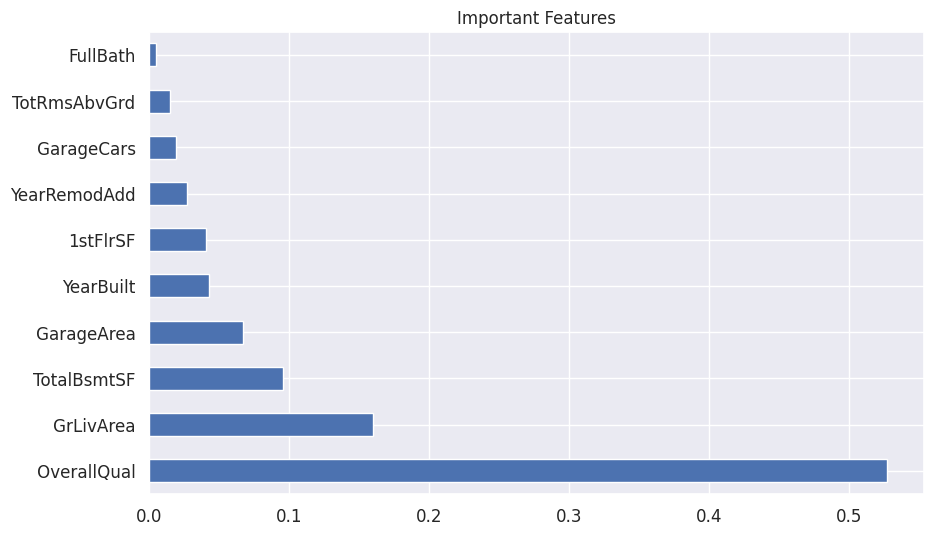

In [ ]:
plt.figure(figsize=(10,6))
rfc_fimp.nlargest(30).sort_values(ascending=False).plot(kind='barh')
round(rfc_fimp,4)*100
plt.title('Important Features',size=12)
plt.show()

Perbandingan kontribusi fitur fitur yang divisualisasikan dalam plot. Dapat dilihat bahwa fitur OverallQual sangat mendominasi dengan value lebih dari 0.5

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
plt.style.use('default')

In [ ]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

# evaluate model
display(model1.score(x_test, y_test))

#untuk memprediksi
ypred_lr = model1.predict(x_test)

ypred_lr = ypred_lr.reshape(-1,1)

r2_lr = r2_score(y_test,ypred_lr).round(2)
mse_lr = mean_squared_error(y_test, ypred_lr).round(2)
mae_lr = mean_absolute_error(y_test, ypred_lr).round(2)
rmse_lr = np.sqrt(mean_squared_error(y_test, ypred_lr)).round(2) #akar mse

print('R2 : ', r2_lr)
print('MSE : ', mse_lr)
print('MAE : ', mae_lr)
print('RMSE : ', rmse_lr)

0.8092459594323301

R2 :  0.81
MSE :  629302157.21
MAE :  18952.54
RMSE :  25085.9


## Ridge Reggresion

In [ ]:
model2 = Ridge(alpha=0.01)
model2.fit(x_train, y_train)

# evaluate model
display(model2.score(x_test, y_test))

# use model to predict
ypred_rr = model2.predict(x_test)

ypred_rr = ypred_rr.reshape(-1,1)

r2_rr = r2_score(y_test,ypred_rr).round(2)
mse_rr = mean_squared_error(y_test, ypred_rr).round(2)
mae_rr = mean_absolute_error(y_test, ypred_rr).round(2)
rmse_rr = np.sqrt(mean_squared_error(y_test, ypred_rr)).round(2)

print('R2 : ', r2_rr)
print('MSE : ', mse_rr)
print('MAE : ', mae_rr)
print('RMSE : ', rmse_rr)

0.8092461746231208

R2 :  0.81
MSE :  629301447.29
MAE :  18952.52
RMSE :  25085.88


## Lasso Regression

In [ ]:
model3 = Lasso(alpha=0.01)
model3.fit(x_train, y_train)

# evaluate model
display(model3.score(x_test, y_test))

# use model to predict
ypred_ls = model3.predict(x_test)

ypred_ls = ypred_ls.reshape(-1,1)

r2_ls = r2_score(y_test,ypred_ls).round(2)
mse_ls = mean_squared_error(y_test, ypred_ls).round(2)
mae_ls = mean_absolute_error(y_test, ypred_ls).round(2)
rmse_ls = np.sqrt(mean_squared_error(y_test, ypred_ls)).round(2)

print('R2 : ', r2_ls)
print('MSE : ', mse_ls)
print('MAE : ', mae_ls)
print('RMSE : ', rmse_ls)

0.8092459678241826

R2 :  0.81
MSE :  629302129.53
MAE :  18952.54
RMSE :  25085.9


## Decision Tree

In [ ]:
model4 = DecisionTreeRegressor()
model4.fit(x_train, y_train)

# evaluate model
display(model4.score(x_test, y_test))

# use model to predict
ypred_dt = model4.predict(x_test)

ypred_dt = ypred_dt.reshape(-1,1)

r2_dt = r2_score(y_test,ypred_dt).round(2)
mse_dt = mean_squared_error(y_test, ypred_dt).round(2)
mae_dt = mean_absolute_error(y_test, ypred_dt).round(2)
rmse_dt = np.sqrt(mean_squared_error(y_test, ypred_dt)).round(2)

print('R2 : ', r2_dt)
print('MSE : ', mse_dt)
print('MAE : ', mae_dt)
print('RMSE : ', rmse_dt)

0.6242855680179211

R2 :  0.62
MSE :  1239490926.84
MAE :  25783.68
RMSE :  35206.4


## Random Forest

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model4 = RandomForestRegressor(max_depth=2, random_state=0)
model4.fit(x_train, y_train)

# evaluate model
display(model4.score(x_test, y_test))

# use model to predict
ypred_rf = model4.predict(x_test)

ypred_rf = ypred_rf.reshape(-1,1)

r2_rf = r2_score(y_test,ypred_rf).round(2)
mse_rf = mean_squared_error(y_test, ypred_rf).round(2)
mae_rf = mean_absolute_error(y_test, ypred_rf).round(2)
rmse_rf = np.sqrt(mean_squared_error(y_test, ypred_rf)).round(2)

print('R2 : ', r2_rf)
print('MSE : ', mse_rf)
print('MAE : ', mae_rf)
print('RMSE : ', rmse_rf)

<ipython-input-59-279486a121ad>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(x_train, y_train)


0.6902591766392854

R2 :  0.69
MSE :  1021842408.88
MAE :  25019.45
RMSE :  31966.27


## Gradient Boosting

In [ ]:
model6 = GradientBoostingRegressor()
model6.fit(x_train, y_train)

# evaluate model
display(model6.score(x_test, y_test))

# use model to predict
ypred_gb = model6.predict(x_test)

ypred_gb = ypred_gb.reshape(-1,1)

r2_gb = r2_score(y_test,ypred_gb).round(2)
mse_gb = mean_squared_error(y_test, ypred_gb).round(2)
mae_gb = mean_absolute_error(y_test, ypred_gb).round(2)
rmse_gb = np.sqrt(mean_squared_error(y_test, ypred_gb)).round(2)

print('R2 : ', r2_gb)
print('MSE : ', mse_gb)
print('MAE : ', mae_gb)
print('RMSE : ', rmse_gb)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8362230649838608

R2 :  0.84
MSE :  540304038.65
MAE :  16848.78
RMSE :  23244.44


#CROSS VALIDATION

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

## Decision Tree Regression with CV


In [ ]:
model5 = DecisionTreeRegressor()
model5.fit(x_train, y_train)

# Melakukan cross-validation dengan 5-fold
scores = cross_val_score(model5, x_train, y_train, cv=5, scoring='r2')

# Menampilkan hasil cross-validation
print("Hasil cross-validation (R-squared):", scores)
print("Rata-rata R-squared:", scores.mean())

# Menggunakan model untuk memprediksi data pengujian
ypred_dt = model5.predict(x_test)

# Menghitung metrik evaluasi
r2_dt = r2_score(y_test, ypred_dt).round(2)
mse_dt = mean_squared_error(y_test, ypred_dt).round(2)
mae_dt = mean_absolute_error(y_test, ypred_dt).round(2)
rmse_dt = np.sqrt(mean_squared_error(y_test, ypred_dt)).round(2)

# Menampilkan metrik evaluasi
print('R2 : ', r2_dt)
print('MSE : ', mse_dt)
print('MAE : ', mae_dt)
print('RMSE : ', rmse_dt)


Hasil cross-validation (R-squared): [0.60312721 0.63991698 0.48613171 0.54432    0.63184723]
Rata-rata R-squared: 0.5810686267248076
R2 :  0.63
MSE :  1225178860.35
MAE :  25023.42
RMSE :  35002.56


<ipython-input-99-3278cba9f6dd>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


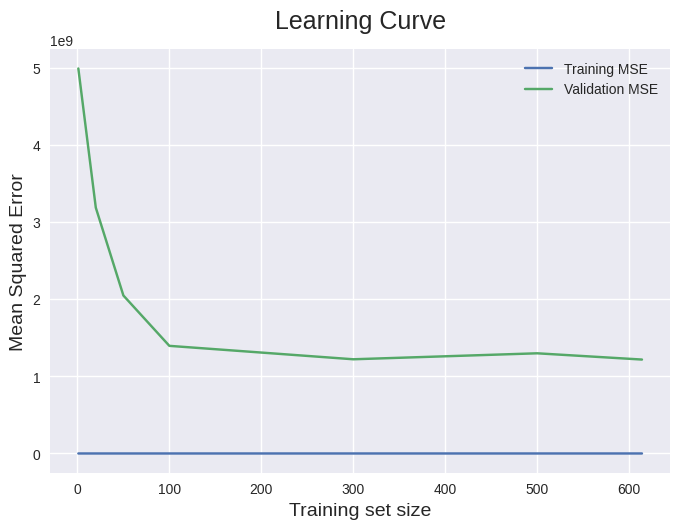

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import pandas as pd

def learn_curve_plot(estimator, x, y, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, x, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    validation_scores_mean = -validation_scores.mean(axis=1)

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label='Training MSE')
    plt.plot(train_sizes, validation_scores_mean, label='Validation MSE')
    plt.ylabel('Mean Squared Error', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.title('Learning Curve', fontsize=18, y=1.03)
    plt.legend()
    plt.show()

# Buat objek DecisionTreeRegressor dengan parameter yang sesuai
model_decision_tree = DecisionTreeRegressor()

# Panggil fungsi learn_curve_plot dengan model_decision_tree sebagai estimator
learn_curve_plot(estimator=model_decision_tree, x=x, y=y, train_sizes=[1, 20, 50, 100, 300, 500, 614], cv=5)


Pada learning curve decision tree ini model dapat dikatakan underfitting karena memiliki gap yang cukup besar.

## Random Forest with CV

In [ ]:
model5 = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model5.fit(x_train, y_train)

# cross-validation dengan 5-fold
scores = cross_val_score(model5, x_train, y_train, cv=5, scoring='r2')

print("Hasil cross-validation (R-squared):", scores)
print("Rata-rata R-squared:", scores.mean())

ypred_rf = model5.predict(x_test)

r2_rf = r2_score(y_test, ypred_rf).round(2)
mse_rf = mean_squared_error(y_test, ypred_rf).round(2)
mae_rf = mean_absolute_error(y_test, ypred_rf).round(2)
rmse_rf = np.sqrt(mean_squared_error(y_test, ypred_rf)).round(2)

print('R2 : ', r2_rf)
print('MSE : ', mse_rf)
print('MAE : ', mae_rf)
print('RMSE : ', rmse_rf)

<ipython-input-72-059df0eb2452>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model5.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Hasil cross-validation (R-squared): [0.76904205 0.83786917 0.79579318 0.83461725 0.7847318 ]
Rata-rata R-squared: 0.8044106860988673
R2 :  0.82
MSE :  597072887.97
MAE :  17759.64
RMSE :  24435.07


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

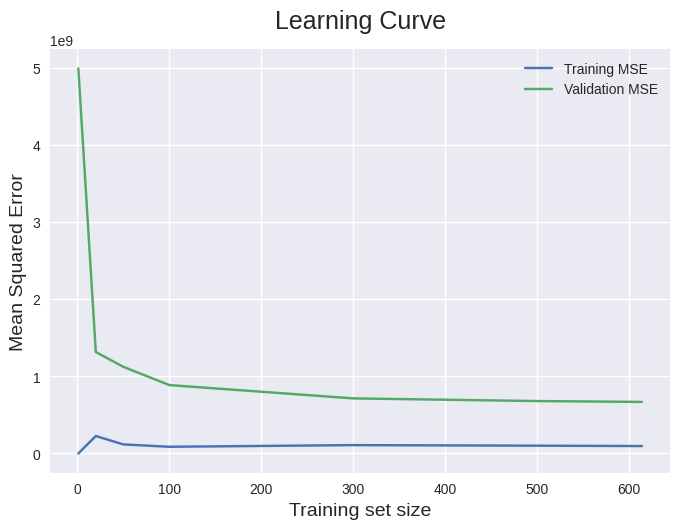

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import pandas as pd

def learn_curve_plot(estimator, x, y, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, x, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    validation_scores_mean = -validation_scores.mean(axis=1)

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label='Training MSE')
    plt.plot(train_sizes, validation_scores_mean, label='Validation MSE')
    plt.ylabel('Mean Squared Error', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.title('Learning Curve', fontsize=18, y=1.03)
    plt.legend()
    plt.show()

# Buat objek DecisionTreeRegressor dengan parameter yang sesuai
model_decision_tree = RandomForestRegressor()

# Panggil fungsi learn_curve_plot dengan model_decision_tree sebagai estimator
learn_curve_plot(estimator=model_decision_tree, x=x, y=y, train_sizes=[1, 20, 50, 100, 300, 500, 614], cv=5)


Pada learning curve random forest ini, gap yang dimiliki awalnya cukup jauh, namun semakin ke kanan garis antara validation dan dan training kemungkinan akan beririsan/bersinggungan. Namun, model ini juga masih dikatakan underfitting.

## Model Comparison

In [ ]:
#buat dataframe untuk compare beberapa model yang telah dibangun

data = np.array([['', 'R2', 'MSE', 'MAE', 'RMSE'],
                ['Linear Regression', r2_lr, mse_lr, mae_lr, rmse_lr],
                ['Ridge Regression', r2_rr, mse_rr, mae_rr, rmse_rr],
                ['Lasso Regression', r2_ls, mse_ls, mae_ls, rmse_ls],
                ['DTR', r2_dt, mse_dt, mae_dt, rmse_dt],
                ['RFR', r2_rf, mse_rf, mae_rf, rmse_rf],
                ['GB', r2_gb, mse_gb, mae_gb, rmse_gb]])

In [ ]:
data

array([['', 'R2', 'MSE', 'MAE', 'RMSE'],
       ['Linear Regression', '0.81', '629302157.21', '18952.54',
        '25085.9'],
       ['Ridge Regression', '0.81', '629301447.29', '18952.52',
        '25085.88'],
       ['Lasso Regression', '0.81', '629302129.53', '18952.54',
        '25085.9'],
       ['DTR', '0.63', '1225178860.35', '25023.42', '35002.56'],
       ['RFR', '0.82', '597072887.97', '17759.64', '24435.07'],
       ['GB', '0.84', '540304038.65', '16848.78', '23244.44']],
      dtype='<U32')

In [ ]:
table = pd.DataFrame(data = data[1:, 1:],
                     index = data[1:,0],
                     columns = data[0,1:])
table

,R2,MSE,MAE,RMSE
Linear Regression,0.81,629302157.21,18952.54,25085.9
Ridge Regression,0.81,629301447.29,18952.52,25085.88
Lasso Regression,0.81,629302129.53,18952.54,25085.9
DTR,0.63,1225178860.35,25023.42,35002.56
RFR,0.82,597072887.97,17759.64,24435.07
GB,0.84,540304038.65,16848.78,23244.44


Dari hasil evaluasi model, model Gradient Boosting (GB) menunjukkan performa terbaik dengan nilai R2 tertinggi (0.84) dan tingkat kesalahan prediksi yang rendah, diukur dengan MSE (540304038.65) dan MAE (16848.78). Hal ini mengindikasikan kemampuan GB dalam menjelaskan variabilitas data target dan menghasilkan prediksi yang akurat. Model Random Forest Regression (RFR) juga memiliki performa yang baik dengan R2 sekitar 0.82 dan MSE sekitar 597072887.97. Model-model linear, seperti Linear Regression, Ridge Regression, dan Lasso Regression, memberikan hasil yang sebanding (R2 sekitar 0.81), tetapi memiliki tingkat kesalahan prediksi yang sedikit lebih tinggi. Model Decision Tree Regression (DTR) memiliki performa paling rendah dengan R2 sekitar 0.63 dan RMSE tertinggi (35002.56).

# HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
gb = GradientBoostingRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = display(best_grid.score(x_test, y_test))
grid_accuracy

0.8277441500832095

# LEARNING CURVE

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.

Mean training scores
 1           NaN
20    -1.000000
50    -0.999614
100   -0.996218
300   -0.963472
500   -0.942777
614   -0.934330
dtype: float64

--------------------

Mean validation scores
 1      0.427557
20    -0.488298
50    -0.637390
100   -0.741299
300   -0.795697
500   -0.813755
614   -0.814648
dtype: float64


<ipython-input-98-35a2ed1672a9>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


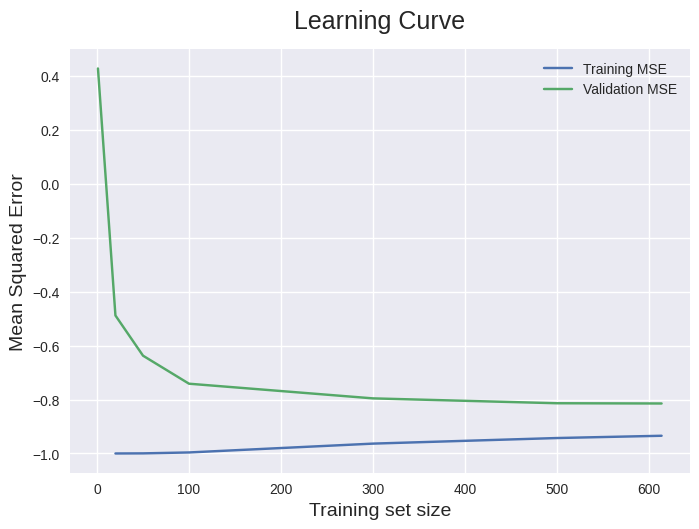

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import pandas as pd

def learn_curve_plot(estimator, x, y, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, x, y, train_sizes=[1, 20, 50, 100, 300, 500, 614], cv=cv)
    train_scores_mean = -train_scores.mean(axis=1)
    validation_scores_mean = -validation_scores.mean(axis=1)

    # Print the mean training and validation scores
    print('Mean training scores\n', pd.Series(train_scores_mean, index=train_sizes))
    print('\n' + '-'*20) # Separator
    print('\nMean validation scores\n', pd.Series(validation_scores_mean, index=train_sizes))

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label='Training MSE')
    plt.plot(train_sizes, validation_scores_mean, label='Validation MSE')
    plt.ylabel('Mean Squared Error', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.title('Learning Curve', fontsize=18, y=1.03)
    plt.legend()
    plt.show()

# Panggil fungsi learn_curve_plot dengan model1 sebagai estimator
learn_curve_plot(estimator=model6, x=x, y=y, train_sizes=[1, 20, 50, 100, 300, 500, 614], cv=5)


Tampak gap pada learning curve diatas semakin ke kanan semakin mengecil, memungkinkan garis training akan bersinggungan dengan validation MSE, ini menunjukkan bahwa model akan semakin baik dalam memodelkan data. Kinerja model menjadi lebih stabil dan mungkin akan mencapai tingkat optimal

Sumber Referensi:
- Sesi Mentoring
- Live Session
- Modul Startup Campus
- https://www.w3schools.com/statistics/statistics_quartiles_and_percentiles.php
- https://www.dicoding.com/academies/615/tutorials/33103